<a href="https://colab.research.google.com/github/whyeon92/ESAA_OB/blob/Code_Study/ESAA_HW0909.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

모델을 훈련시키는 두 가지 방법
- 직접 계산할 수 있는 공식을 활용, 모델 파라미터를 구한다
- 경사 하강법을 통해 모델 파라미터를 조정해가며 파라미터 구함.

# 4.1 선형 회귀

## 4.1.1 정규방정식

In [1]:
import numpy as np

X = 2*np.random.rand(100, 1)
y = 4 + 3*X + np.random.rand(100, 1)

In [2]:
X_b = np.c_[np.ones((100, 1)), X]  #모든 샘플에 x0 = 1을 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
theta_best

array([[4.54216892],
       [2.98730797]])

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  #모든 샘플에 x0 = 1을 추가
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.54216892],
       [10.51678486]])

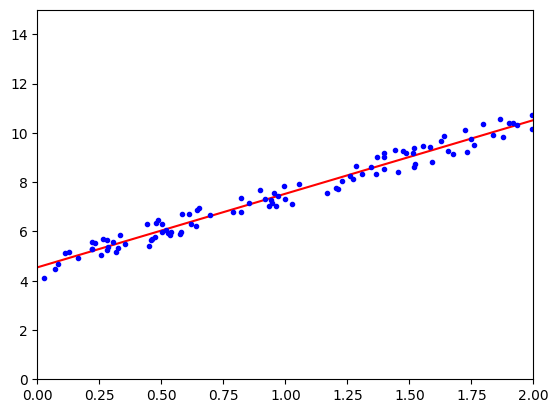

In [6]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [8]:
lin_reg.intercept_, lin_reg.coef_

(array([4.54216892]), array([[2.98730797]]))

In [9]:
lin_reg.predict(X_new)

array([[ 4.54216892],
       [10.51678486]])

In [10]:
theta_best_svd, residuals, rank, s=np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.54216892],
       [2.98730797]])

In [11]:
np.linalg.pinv(X_b).dot(y)

array([[4.54216892],
       [2.98730797]])

## 4.1.2 계산 복잡도

# 4.2 경사 하강법

## 4.2.1 배치 경사 하강법

In [12]:
eta = 0.1 #학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)  #무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients

In [13]:
theta

array([[4.54216892],
       [2.98730797]])

: 매 경사 하강법 스텝에서 전체 훈련 세트에 대해 계산하는 방법, 따라서 모든 훈련 세트를 사용해서 훈련  
- 계산량이 많아 느림
- 특성 수에 민감하지 않음
- 수많은 특성에서 선형 회귀를 훈련시키기에 적합

## 4.2.2 확률적 경사 하강법

In [14]:
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케쥴 하이퍼파라미터

def learning_schedule(t):
    return t0/(t + t1)

theta = np.random.randn(2, 1)  #무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients

In [15]:
theta

array([[4.53399274],
       [3.00192191]])

In [16]:
from sklearn.linear_model import SGDRegressor

sgd_reg=SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [17]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.54637437]), array([3.00401338]))

: 한번에 하나의 데이터만 사용해서 경사하강법을 구현하는 방법  
- 데이터를 하나씩만 사용하기 때문에 계산량이 적어 빠름
- 배치 경사하강법에 비해 계산 효율적
- 무작위로 하나의 데이터를 선택하기 때문에 불안정
- 알고리즘이 멈출 때 좋은 파라미터가 구해지지만 최적치라고 할 순 없음
- 알고리즘이 지역 최솟값을 건너뛸 수 있도록 도와주기에 배치 경사하강법보다 전역 최솟값을 찾을 가능성이 높음
- 그러나 전역 최솟값에 다다르진 못함

[학습 스케줄]  
: 위에서 언급한 전역 최솟값으로 다다르지 못하는 문제로 인해서 점차 학습률을 줄여가며 학습시키는 것  
- 점진적으로 학습률을 줄여서 최적값에 가까워질수록 더 자세히 파라미터를 찾아 효율적인 학습에 도움

## 4.2.3 미니배치 경사하강법

: 배치와 확률적의 단점을 보완, 작은 샘플 세트에 대해서 경사하강법을 진행.  
미니배치: 랜덤하게 정한 작은 샘플 세트  
- 확률적 경사하강법에 비해 안정적
- 배치 경사하강법에 비해 빠름

결론적으로 정규방정식, SVD와 비교했을 때 가장 무난하게 사용하기 좋다~

# 4.3 다항 회귀

In [18]:
m = 100
X = 6*np.random.rand(m, 1) - 3
y = 0.5*X**2 + X + 2 + np.random.randn(m, 1)

In [19]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.4612834])

In [20]:
X_poly[0]

array([-0.4612834 ,  0.21278238])

In [21]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.11552044]), array([[0.98079949, 0.50380834]]))

# 4.4 학습 곡선

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth = 2, label = '훈련 세트')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth = 3, label = '검증 세트')

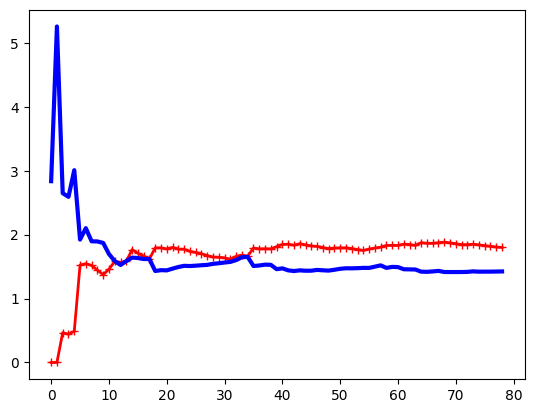

In [23]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

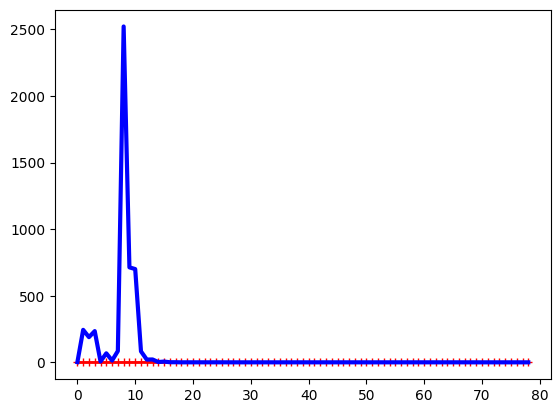

In [24]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree = 10, include_bias = False)),
    ('lin_reg', LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)

[학습곡선]  
: 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기의 함수로 나타냄.  
- 훈련 세트와 검증 세트의 학습곡선이 수평한 구간을 만들고 높은 오차에서 가까이 근접해 있으면 -> 과소적합  
- 훈련, 검증 학습곡선간의 차이가 크고 훈련에서의 오차가 매우 낮다 -> 과대적합  


# 4.5 규제가 있는 선형 모델

## 4.5.1 릿지 회귀

In [25]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 1, solver = 'cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.14056525]])

In [26]:
sgd_reg = SGDRegressor(penalty = 'l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.12735961])

## 4.5.2 라쏘 회귀

In [28]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.09160786])

## 4.5.3 엘라스틱넷

In [29]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.09606465])

## 4.5.4 조기 종료

In [30]:
from sklearn.base import clone
#임포트 안된 패키지 임포트
from sklearn.preprocessing import StandardScaler

#데이터 준비
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree = 90, include_bias = False)),
    ('std_scaler', StandardScaler())
])

#추가
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled,y_train.ravel()) # 훈련을 이어서 진행한다.
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

# 4.6 로지스틱 회귀

## 4.6.1 확률 추정

## 4.6.2 훈련과 비용 함수

## 4.6.3 결정 경계

In [31]:
from sklearn import datasets
iris=datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [32]:
X = iris['data'][:, 3:]  #꽃잎의 너비
y = (iris["target"]==2).astype(int)  #1 Iris-Virginica면 1, 그렇지 않으면 0

In [33]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

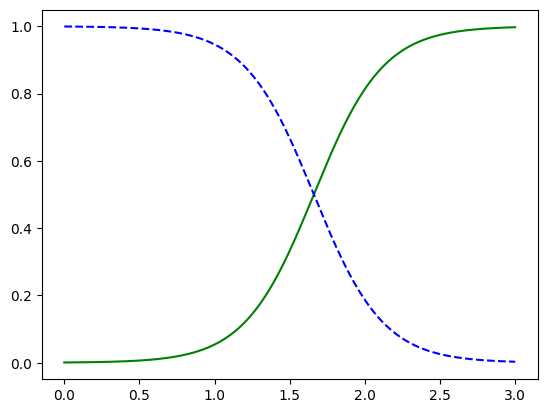

In [34]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label = 'Iris virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label = 'Not iris virginica')

In [35]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

## 4.6.4 소프트맥스 회귀

In [36]:
X = iris['data'][:, (2, 3)]  #꽃잎의 길이, 너비
y = iris['target']

softmax_reg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', C = 10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [37]:
softmax_reg.predict([[5, 2]])

array([2])

In [38]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])